## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

#### Read the iris.csv file

In [210]:
# Import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\Mini Project\\SLC Miniproject\\SLC Miniproject\\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [212]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [213]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(df.iloc[:,:-1])
imputed_data = imputer.transform(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputed_data

iris=df

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [214]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [215]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

iris['Species'] = class_label_encoder.fit_transform(iris.Species)

In [216]:
iris['Species'].unique()

array([0, 1, 2], dtype=int64)

In [217]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.40,0.2,0
1,2.0,4.9,3.0,1.40,0.2,0
2,3.0,4.7,3.2,1.30,0.2,0
3,4.0,4.6,3.1,1.50,0.2,0
4,5.0,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...,...
147,148.0,6.5,3.0,5.20,2.0,2
148,149.0,6.2,3.4,5.40,2.3,2
149,150.0,5.9,3.0,5.10,1.8,2
150,151.0,5.9,3.0,4.35,1.3,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [218]:
cor=iris.corr()
cor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


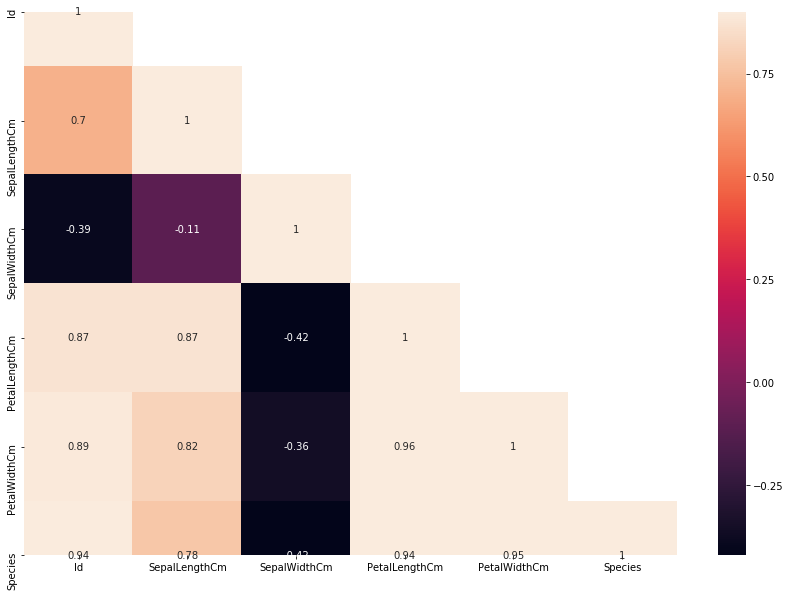

In [219]:
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(15,10))
sns.heatmap(cor,mask=mask,square=True,annot=True,vmax=0.9,)
plt.show()

In [220]:
# Conclusion: There is no variable with correlation in range -0.1 to 0.1 with target variable(Species)

# Question 5

* Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [221]:
iris.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

In [222]:
#Conclusion: There is no variable with varriance<0.1

## Question 6

*Plot the scatter matrix for all the variables.*

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


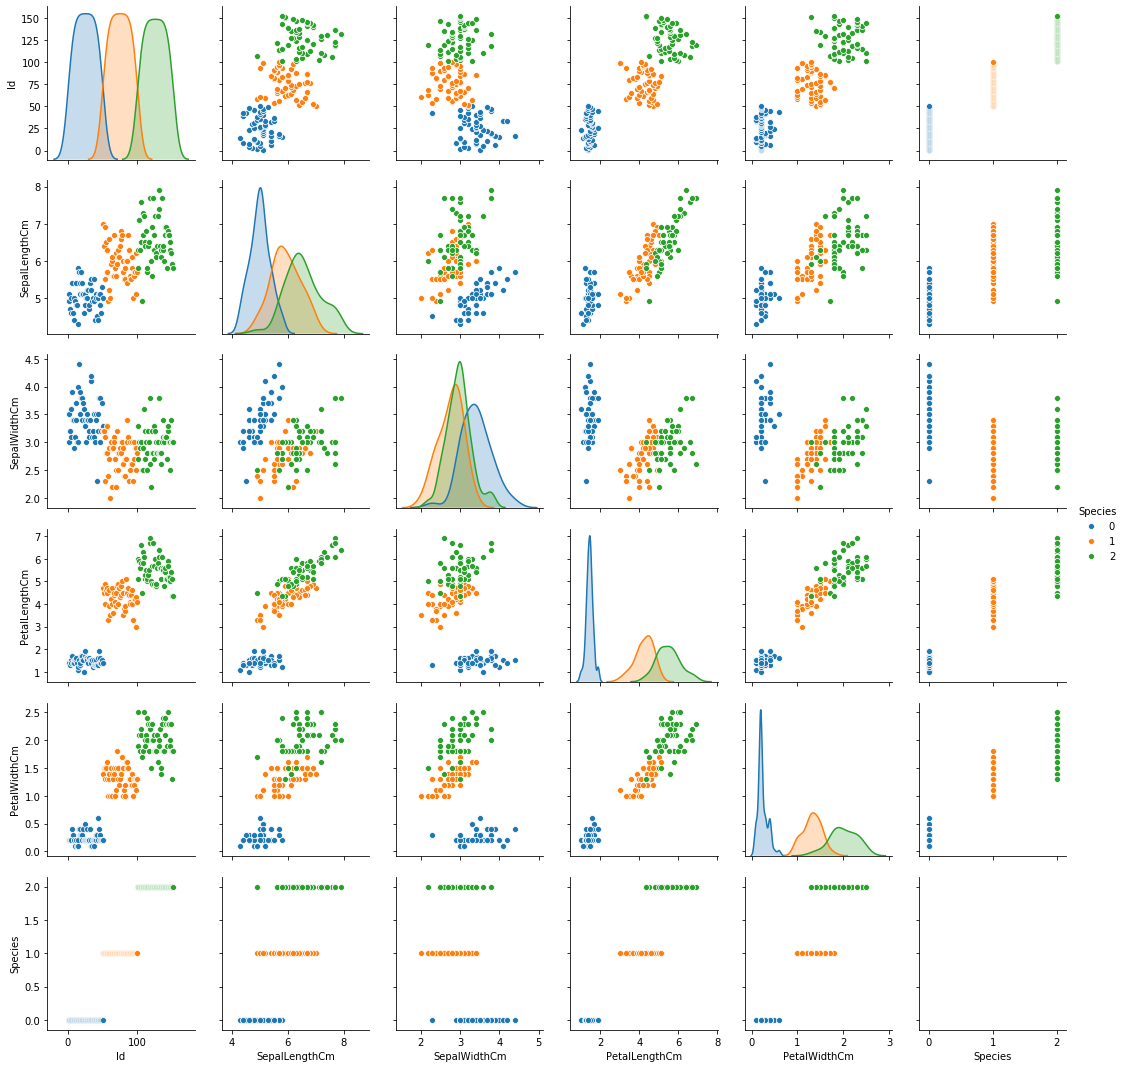

In [223]:
sns.pairplot(df,hue='Species')
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [224]:
X=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [225]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)

(121, 4)
(31, 4)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [226]:
from sklearn.neighbors import KNeighborsClassifier
knn_3=KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [227]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [228]:
y_train_pred_k3=knn_3.predict(X_train)
y_test_pred_k3=knn_3.predict(X_test)

print('Accuracy of train data with k=3:',accuracy_score(y_train,y_train_pred_k3))
print('Accuracy of test data with k=3:',accuracy_score(y_test,y_test_pred_k3))

Accuracy of train data with k=3: 0.9586776859504132
Accuracy of test data with k=3: 0.967741935483871


In [229]:
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)

y_train_pred_k5=knn_5.predict(X_train)
y_test_pred_k5=knn_5.predict(X_test)

print('Accuracy of train data with k=5:',accuracy_score(y_train,y_train_pred_k5))
print('Accuracy of test data with k=5:',accuracy_score(y_test,y_test_pred_k5))

Accuracy of train data with k=5: 0.9669421487603306
Accuracy of test data with k=5: 0.967741935483871


In [230]:
knn_9=KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train,y_train)

y_train_pred_k9=knn_9.predict(X_train)
y_test_pred_k9=knn_9.predict(X_test)

print('Accuracy of train data with k=9:',accuracy_score(y_train,y_train_pred_k9))
print('Accuracy of test data with k=9:',accuracy_score(y_test,y_test_pred_k9))

Accuracy of train data with k=9: 0.9669421487603306
Accuracy of test data with k=9: 0.967741935483871


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [231]:
neighbours=list(np.arange(1,20,2))
neighbours

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [232]:
acc_score=[]

for i in neighbours:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_test=knn.predict(X_test)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    acc_score.append(1-accuracy_test)
for i,j in zip(neighbours,acc_score):
    print('Mis classification error when k=',i,'is',j)

Mis classification error when k= 1 is 0.09677419354838712
Mis classification error when k= 3 is 0.032258064516129004
Mis classification error when k= 5 is 0.032258064516129004
Mis classification error when k= 7 is 0.032258064516129004
Mis classification error when k= 9 is 0.032258064516129004
Mis classification error when k= 11 is 0.032258064516129004
Mis classification error when k= 13 is 0.032258064516129004
Mis classification error when k= 15 is 0.032258064516129004
Mis classification error when k= 17 is 0.032258064516129004
Mis classification error when k= 19 is 0.032258064516129004


In [233]:
optimal_k = neighbours[acc_score.index(min(acc_score))]
print('Optimal number of neighbours is:',optimal_k)

Optimal number of neighbours is: 3


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

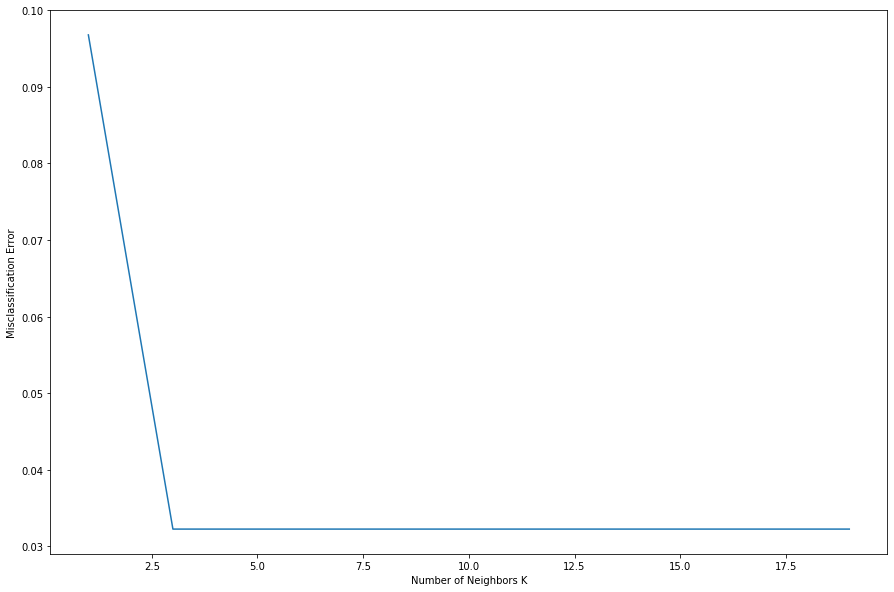

In [234]:
plt.figure(figsize=(15,10))
plt.plot(neighbours,acc_score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes

### Question 1
#### Import Iris.csv

In [235]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\Mini Project\\SLC Miniproject\\SLC Miniproject\\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [236]:
df.shape

(152, 6)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [238]:
df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [239]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy='mean',axis=1)
df.iloc[:,1:-1]=imputer.fit_transform(df.iloc[:,1:-1])

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [240]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [241]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,-1]=le.fit_transform(df.iloc[:,-1])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [242]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

In [243]:
df.Species.value_counts()

2    52
1    50
0    50
Name: Species, dtype: int64

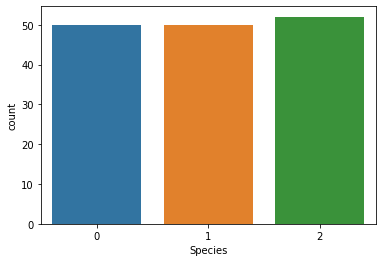

In [244]:
sns.countplot(df['Species'])
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


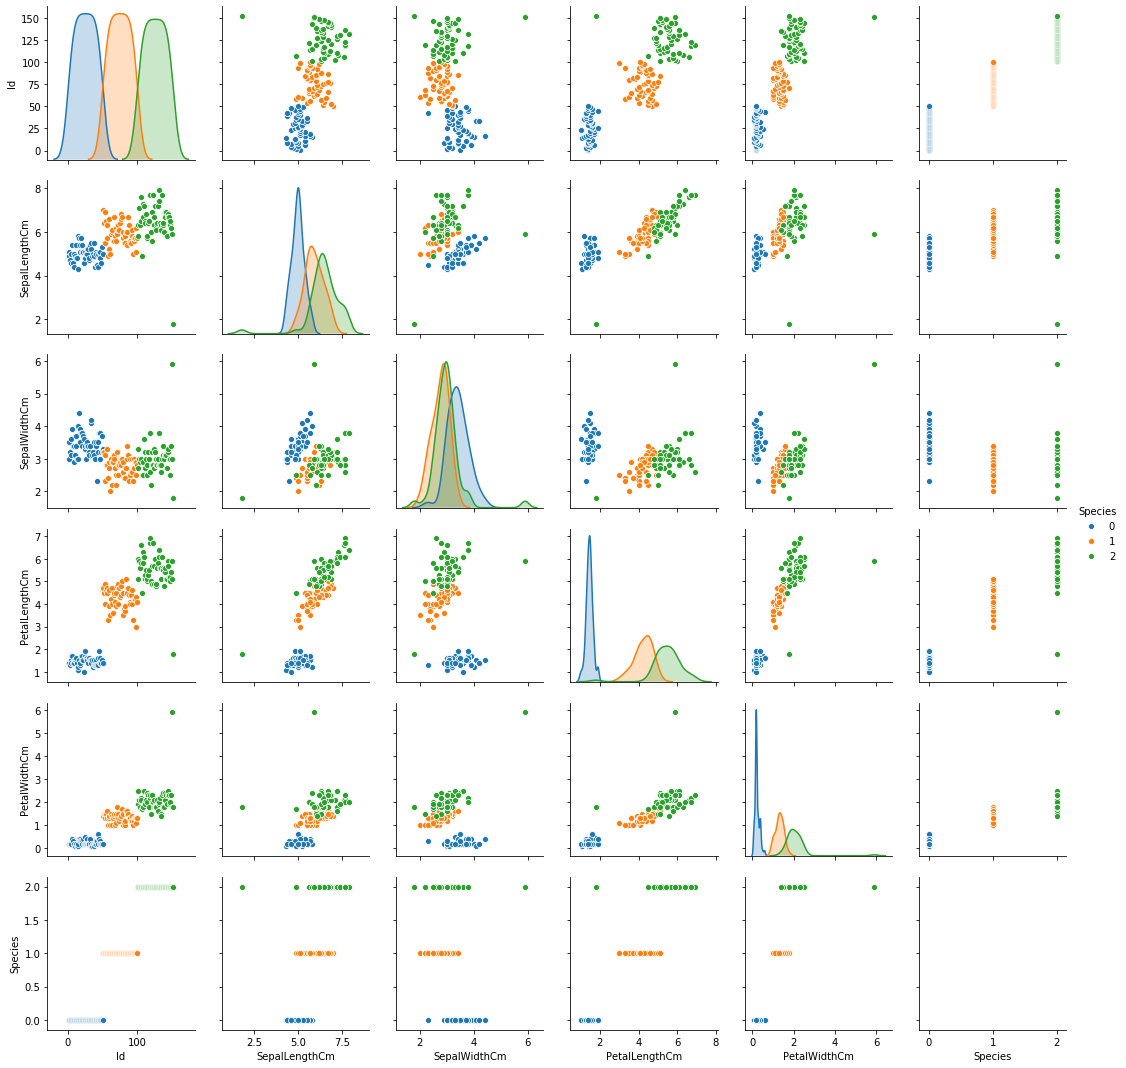

In [245]:
sns.pairplot(df,hue='Species')
plt.show()

### Question 3
#### Find Correlation among all variables and give your insights 

In [246]:
cor=df.corr()
cor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.601461,-0.300894,0.858622,0.856856,0.942753
SepalLengthCm,0.601461,1.000000,-0.008649,0.836514,0.659910,0.684025
SepalWidthCm,-0.300894,-0.008649,1.000000,-0.295298,-0.078148,-0.332848
PetalLengthCm,0.858622,0.836514,-0.295298,1.000000,0.890256,0.932218
PetalWidthCm,0.856856,0.659910,-0.078148,0.890256,1.000000,0.894517
Species,0.942753,0.684025,-0.332848,0.932218,0.894517,1.000000


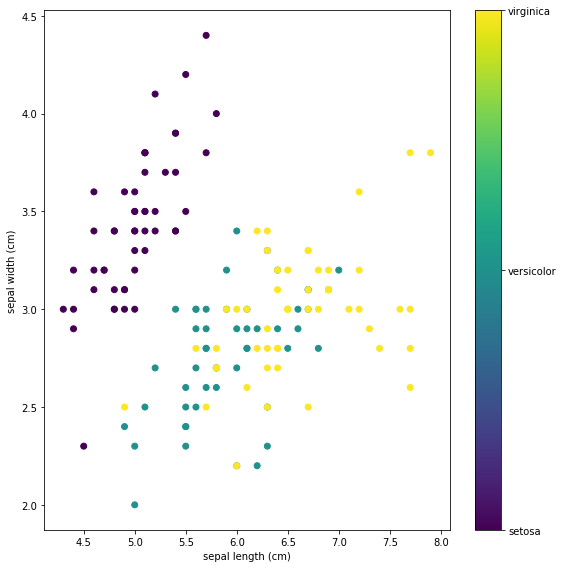

In [247]:
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 8))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Question 4
#### Split data in Training and Validation in 80:20

In [248]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,-1]=le.fit_transform(df.iloc[:,-1])
df.head()

X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [249]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

### Question 5
#### Do Feature Scaling

In [250]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

### Question 6 
#### Train and Fit NaiveBayes Model

In [251]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trains,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [252]:
y_pred_test=gnb.predict(X_tests)
y_compare=np.vstack((y_test,y_pred_test)).T
y_compare[:20,:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0]], dtype=int64)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [253]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred_train=gnb.predict(X_trains)

print('Accuracy of scaled training data:',accuracy_score(y_train,y_pred_train))

print('Confusion matrix of scaled training data:','\n',confusion_matrix(y_train,y_pred_train))

print('Accuracy of scaled testing data:',accuracy_score(y_test,y_pred_test))

print('Confusion matrix of scaled testing data:','\n',confusion_matrix(y_test,y_pred_test))

Accuracy of scaled training data: 0.9504132231404959
Confusion matrix of scaled training data: 
 [[39  0  0]
 [ 0 37  3]
 [ 0  3 39]]
Accuracy of scaled testing data: 1.0
Confusion matrix of scaled testing data: 
 [[11  0  0]
 [ 0 10  0]
 [ 0  0 10]]


# SVM

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

### Question 1
#### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [254]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\Mini Project\\SLC Miniproject\\SLC Miniproject\\pima-indians-diabetes.csv')
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [255]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

### Question 2
#### Check the dimensions of dataset

In [256]:
df.shape

(768, 9)

### Question 3
#### Check distribution of dependent variable 'class' and plot it

In [257]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

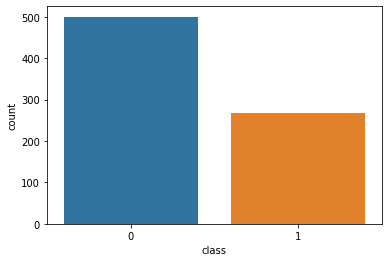

In [258]:
sns.countplot(df['class'])
plt.show()

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Question 4
#### Do correlation analysis and bivariate viualization with Insights

In [260]:
cor=df.corr()
cor

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


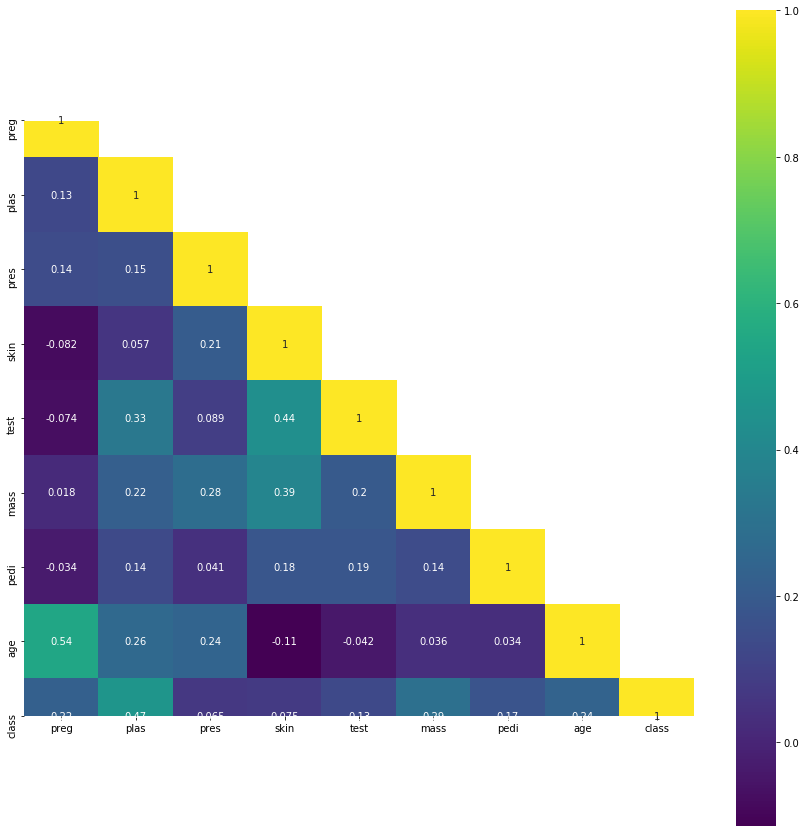

In [261]:
colormap = plt.cm.viridis 
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(15,15))
sns.heatmap(cor,mask=mask,annot=True,square=True,vmax=1.0,linecolor='white', cmap=colormap)
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


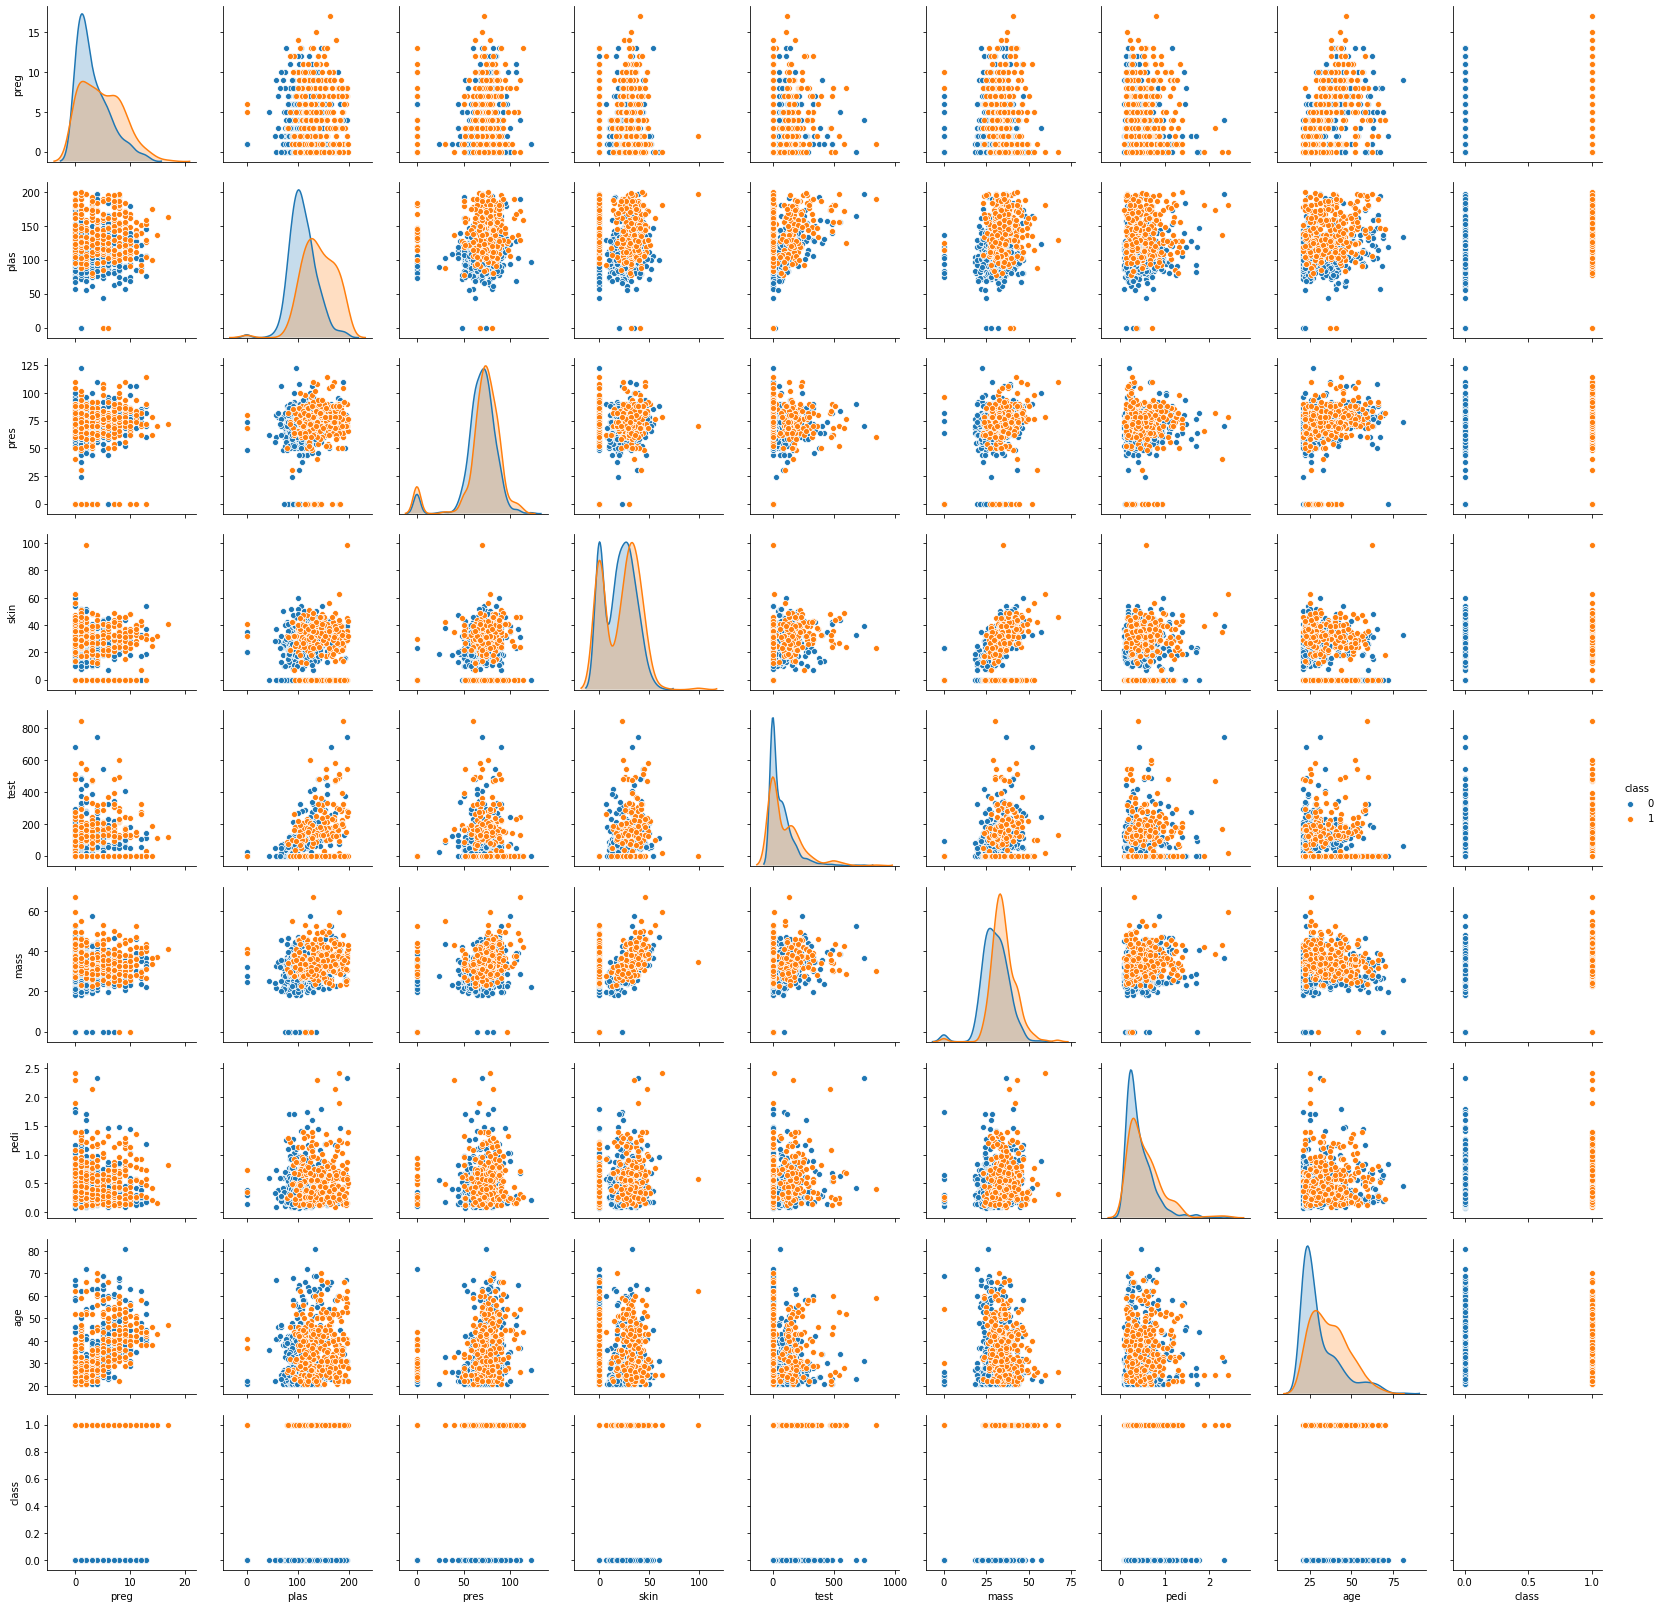

In [262]:
sns.pairplot(df,hue='class')
plt.show()

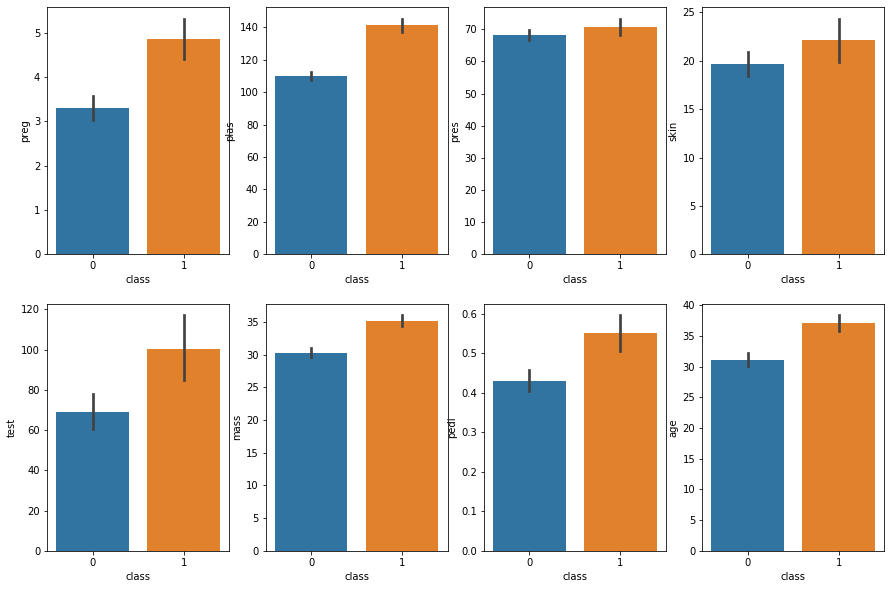

In [263]:
fig,axes=plt.subplots(2,4,figsize=(15,10))
axes=axes.flatten()

for i in range(len(df.columns)-1):
    sns.barplot(x='class',y=df.iloc[:,i],ax=axes[i],data=df)

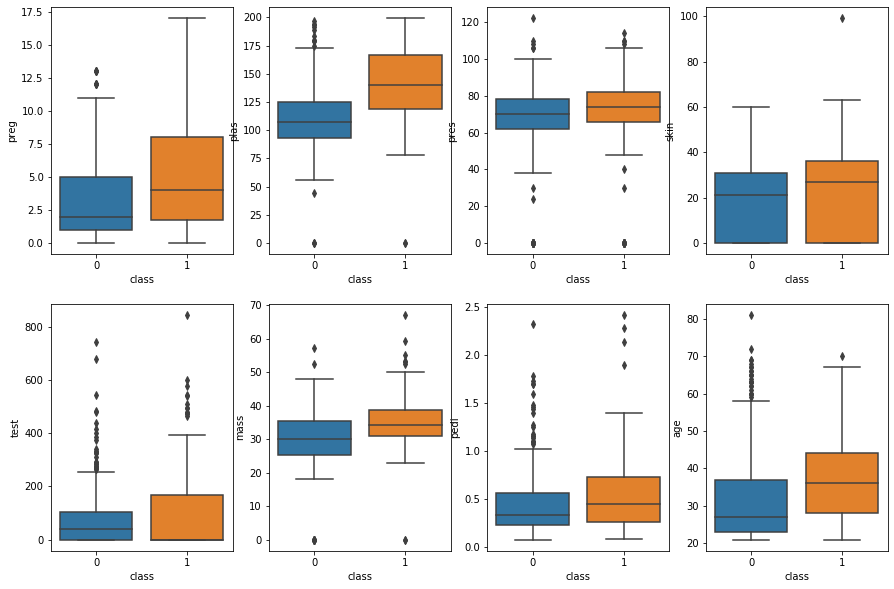

In [264]:
fig,axes=plt.subplots(2,4,figsize=(15,10))
axes=axes.flatten()

for i in range(len(df.columns)-1):
    sns.boxplot(x='class',y=df.iloc[:,i],ax=axes[i],data=df)

### Question 5
#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'class'], df['class'], stratify=df['class'], random_state=0)

In [266]:
X_train.shape

(576, 8)

# Question 6 :Train Support Vector Machine Model

In [267]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Question 7
#### Scale the data points using MinMaxScaler

In [268]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Question 8
#### Fit SVM Model on scaled data and give your observation

In [269]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.77


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Question 9
#### Try improving the model accuracy using C=1000

In [270]:
svc = SVC(C=1000 ,kernel = 'rbf')
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.785
Accuracy on test set: 0.802
